## 2.7 用线性方法处理分类问题——逻辑回归

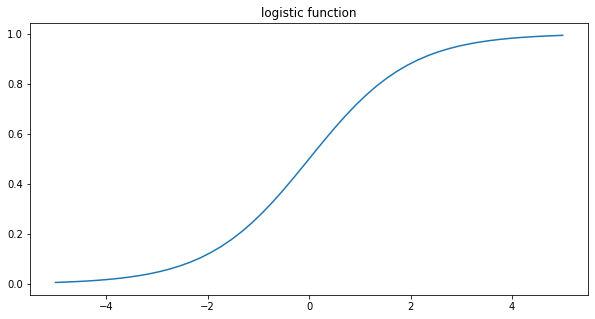

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(figsize=(10,5))

rng = np.linspace(-5,5)
log_f = np.apply_along_axis(lambda x:1/(1+np.exp(-x)),0,rng)

ax.set_title("logistic function")
ax.plot(rng,log_f)

In [23]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000,n_features=4,weights=[0.9])

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

training = np.random.choice([True,False],p=[0.9,0.1],size=y.shape)
testing = ~training

lr.fit(X[training],y[training])
pred = lr.predict(X[testing])
# 正确率
print((pred == y[testing]).mean())

# 偏斜的小类的正确率。
y1 = y[testing]==1
print(y1.shape)
# 小类的正确率很低
print((y1[y1]==pred[y1==1]).sum().astype(float)/y1[y1==1].shape[0])

0.8977272727272727
(88,)
0.47058823529411764


In [31]:
# 使用重采样的方法，来增加小类的数量
# class_weight表示各个标签数据集参与的比例。1标签参与0.9 
lr = LogisticRegression(class_weight={0:.1,1:.9})
lr.fit(X[training],y[training])
pred = lr.predict(X[testing])


y1 = y[testing]==1
print(y1.shape)
# 小类的正确率很低。重采样后。小类的正确率升高。
print((y1[y1]==pred[y1==1]).sum().astype(float)/y1[y1==1].shape[0])

(88,)
0.8235294117647058
